In [115]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [116]:
#Reading the dataset
spark = pd.read_csv("Sparkling.csv", parse_dates = True, index_col = 'YearMonth')
date_rng            =  pd.date_range(start='1/1/1980', end='8/1/1995', freq='m')
date_rng

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [117]:
#Checking if the dataset has been uploaded succesfully
spark.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [118]:
spark.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


The dataset has monthly data of Sparkling Sales from January 1980 to July 1995.

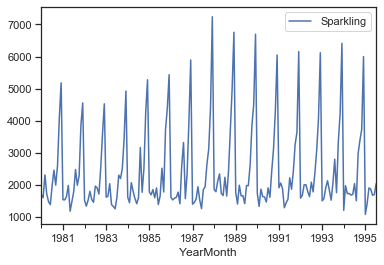

In [119]:
spark.plot()

There is defintely a seasonal component (which is also seen earlier), we can see a clear spike in the sales of Sparkling during end of the year than other months of the year

In [120]:
#Checking the number of rows and columns
print("The number of rows: ",spark.shape[0], "\n""The number of columns: ",spark.shape[1])

The number of rows:  187 
The number of columns:  1


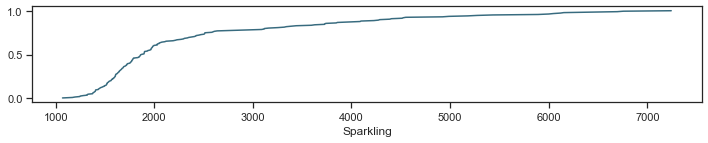

In [121]:
#Plotting the ECDF Curve
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(spark['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sparkling');

In [122]:
#Checking for null values in the dataset
spark.isnull().sum()

Sparkling    0
dtype: int64

There are no null values present in the dataset

In [123]:
spark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [124]:
#separating the year and month as a new column in the dataset in order to do EDA
spark.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [125]:
spark_new = spark.copy()
spark_new["Year"] = spark_new.index.year

In [126]:
spark_new["Month"] = spark_new.index.month

In [127]:
spark_new.head()

,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


In [128]:
#Checking the average sparkling per year
average_sparkling    = spark_new.groupby('Year')["Sparkling"].mean()
average_sparkling.head(16).sort_values()

Year
1995    1660.000000
1982    2110.083333
1983    2181.666667
1981    2185.583333
1980    2367.166667
1984    2369.250000
1990    2414.750000
1986    2430.833333
1994    2465.333333
1991    2465.583333
1985    2470.000000
1992    2514.250000
1987    2521.500000
1993    2582.583333
1989    2620.250000
1988    2770.500000
Name: Sparkling, dtype: float64

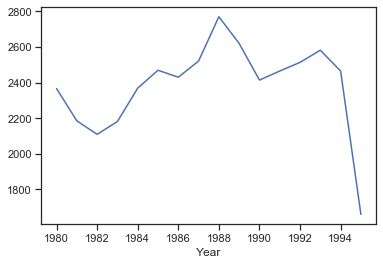

In [129]:
#plotting the average sparkling per year
average_sparkling.plot()

The sales of Sparkling wine was highest in 1988 and lowest in year 1995 (also for year 1995, we only have data for 7 months)
From 1980 to 1982, the sales is declining and then growing till year 1988, there is a sharp decline in sales of SParkling from 1988 to 1990.


In [130]:
#Checking the average sales of Sparkling monthwise
average_sparkling_Month = spark_new.groupby("Month")["Sparkling"].mean()
average_sparkling_Month.head(12).sort_values()

Month
6     1473.250000
1     1580.000000
2     1581.687500
5     1601.937500
4     1773.062500
3     1865.500000
7     1967.125000
9     2169.800000
8     2211.800000
10    3023.533333
11    4099.800000
12    5813.133333
Name: Sparkling, dtype: float64

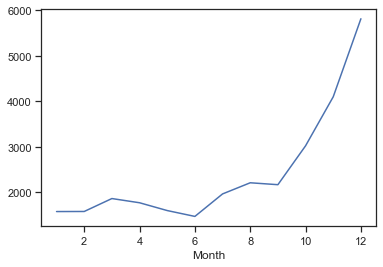

In [131]:
average_sparkling_Month.plot()

December month has highest average sales and june has lowese average sales of wine.

it is clearly visible from the plot that the sales of wine is rapidly increasing from September to december month, may be becasue it is quite cold during that period of time, so wine consumption is more.  

# Yearly Boxplot

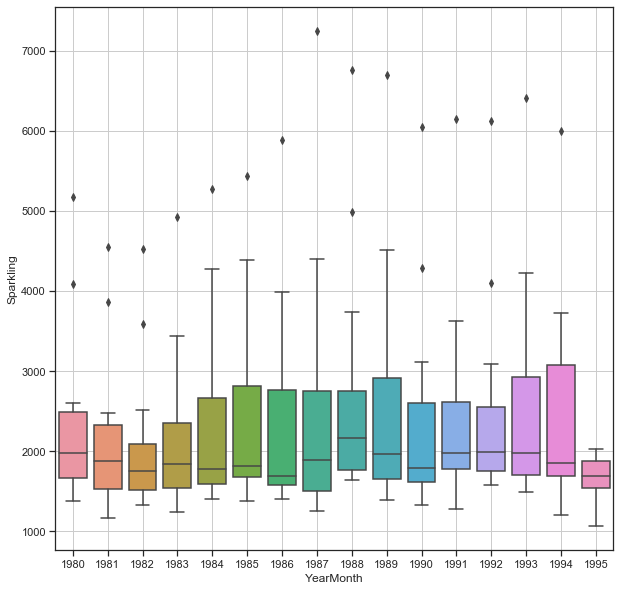

In [132]:
plt.figure(figsize = (10,10))
sns.boxplot(x = spark.index.year,y = spark['Sparkling'])
plt.grid();

# Monthly Boxplot

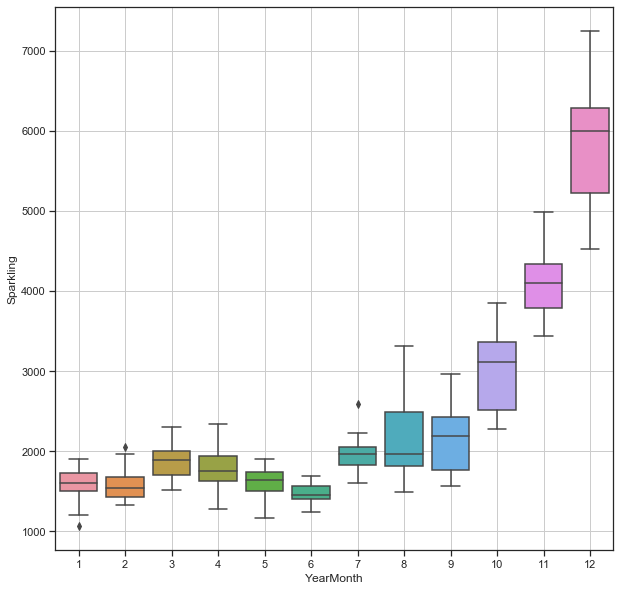

In [133]:
plt.figure(figsize = (10,10))
sns.boxplot(x = spark.index.month,y = spark['Sparkling'])
plt.grid();

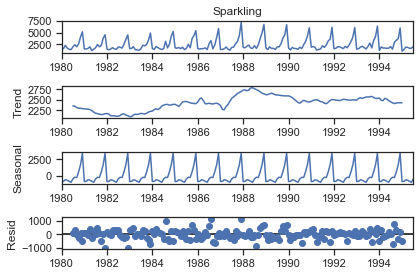

In [134]:
#Decomposing the time series into trend, seasonality and residulas
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(spark.Sparkling,model='additive')
decomposition.plot();

In [135]:
#splitting the data into train and test. 
train  = spark[0:int(len(spark)*0.71)] 
test = spark[int(len(spark)*0.71):]

In [136]:
#checking if the train test split has been done properly
print("Training Data starting point {}".format(train.head()))
print("\n Training Data ending point {}".format(train.tail()))

print("\n Test Data starting point {}".format(test.head()))
print("\n Test Data ending point {}".format(test.tail()))


Training Data starting point             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

 Training Data ending point             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

 Test Data starting point             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

 Test Data ending point             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031


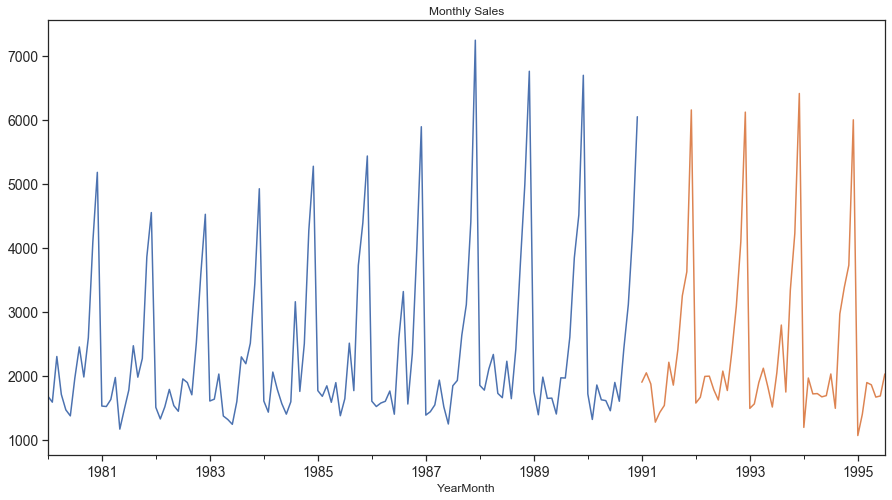

In [137]:
#plotting the train and test dataset
train['Sparkling'].plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)
test['Sparkling'].plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)

# Building the models

In [138]:
#Defining MAPE function
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

# Naive Approach

The forecast will be same as the last value.

In [139]:
dd= np.asarray(train.Sparkling)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

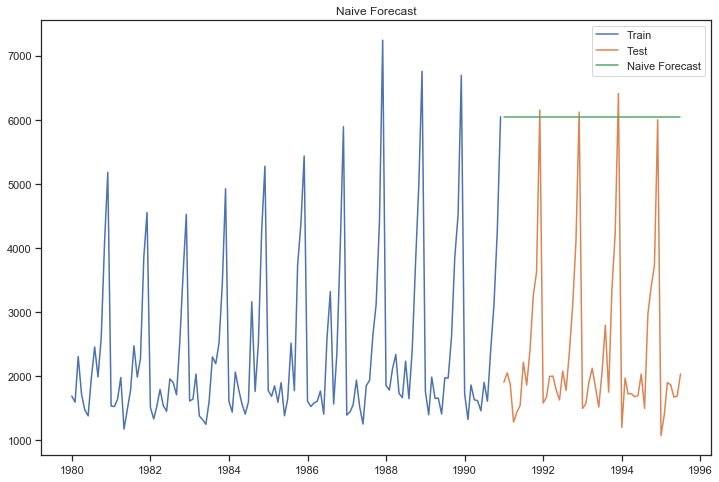

In [140]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sparkling'], label='Train')
plt.plot(test.index,test['Sparkling'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [141]:
from   sklearn.metrics   import mean_squared_error
from   math              import sqrt
rmse = sqrt(mean_squared_error(test.Sparkling, y_hat.naive))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Naive model,  RMSE is 3864.279 MAPE is 152.87


In [142]:
resultsDf = pd.DataFrame({'Method':['Naive Model'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf

,Method,rmse,mape
0,Naive Model,3864.279,152.87


# Simple Average Model

In [143]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sparkling'].mean()

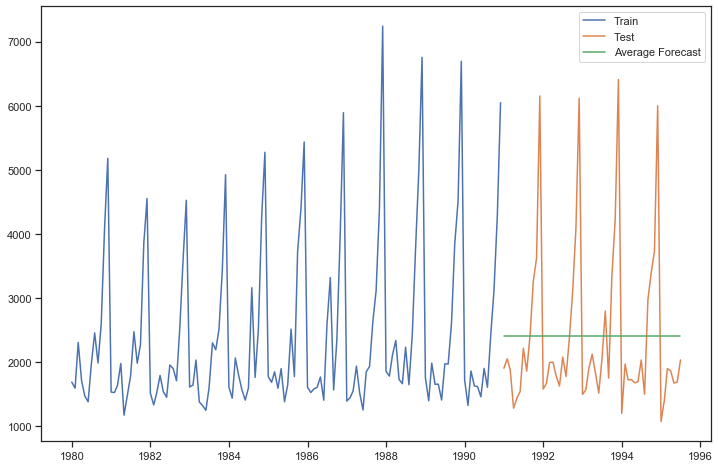

In [144]:
#Plotting the original train and test data with avergae forecast
plt.figure(figsize=(12,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

As we can see from the graph, the predicted values for test data set is the average of all the values from training data.

In [145]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Simple Average model,  RMSE is 1275.082 MAPE is 38.90


In [146]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,Naive Model,3864.279,152.87
0,Simple Average,1275.082,38.90


# Moving Average

In [147]:
#Moving averages for a windoe of 3,6, 9 and 12 month windows
spark_1 = spark.copy()
spark_1['MA_3'] = spark_1.Sparkling.rolling(3).mean()
spark_1['MA_6'] = spark_1.Sparkling.rolling(6).mean()
spark_1['MA_9'] = spark_1.Sparkling.rolling(9).mean()
spark_1['MA_12'] = spark_1.Sparkling.rolling(12).mean()

For Moving Average model, MA_3  RMSE is 1028.606 MAPE is 29.73
For Moving Average model, MA_6  RMSE is 1283.927 MAPE is 43.86
For Moving Average model, MA_9  RMSE is 1346.278 MAPE is 46.86
For Moving Average model, MA_12  RMSE is 1267.925 MAPE is 40.19


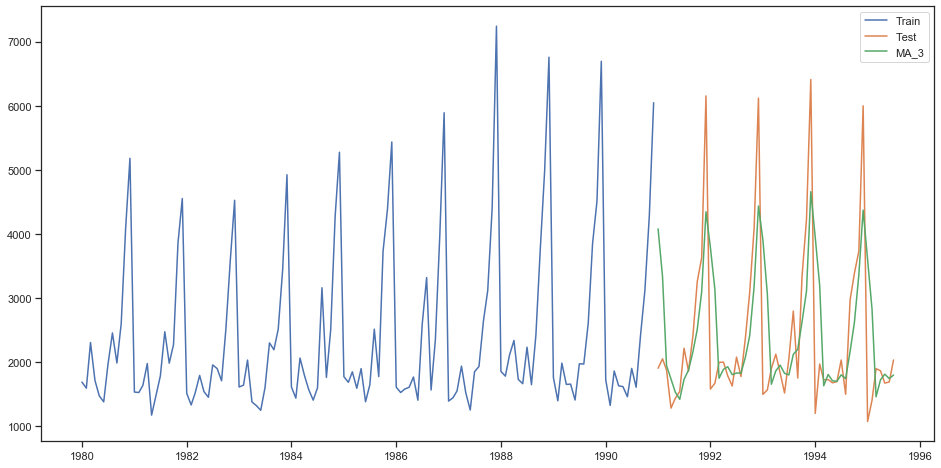

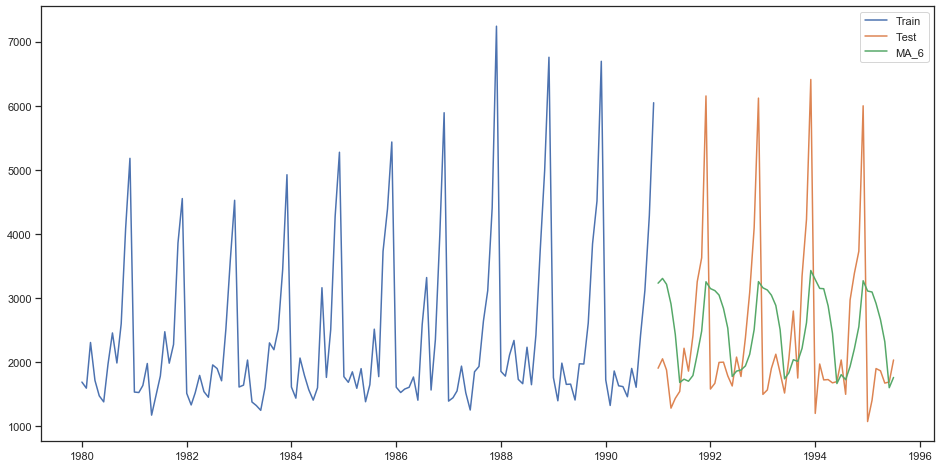

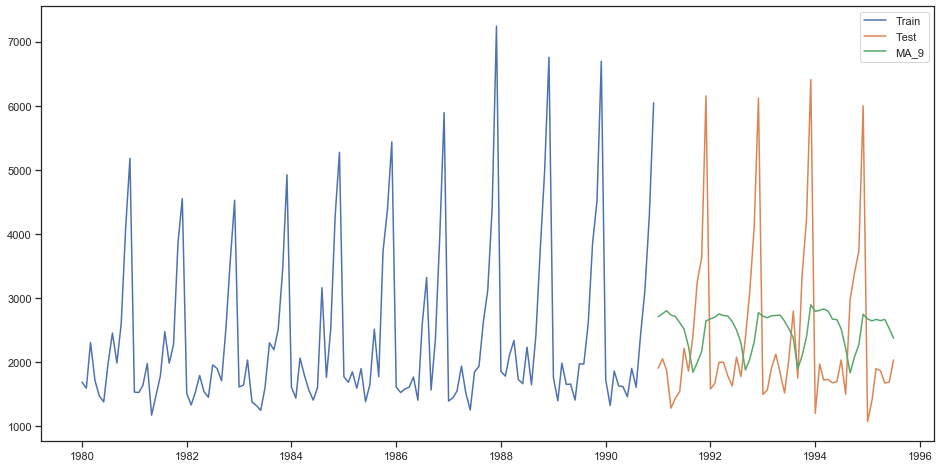

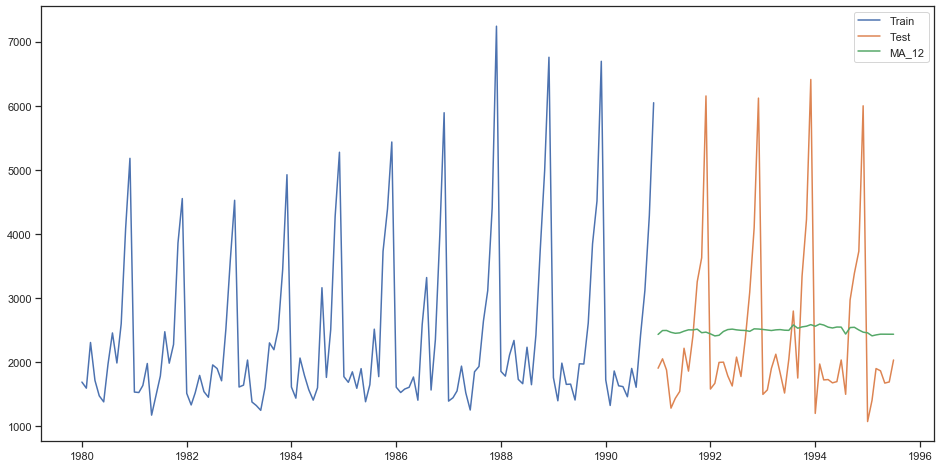

In [148]:
cols = ['MA_3', 'MA_6', 'MA_9','MA_12']

#creating train test split
train_1=spark_1[0:int(len(spark_1)*0.71)] 
test_1=spark_1[int(len(spark_1)*0.71):]

y_hat_avg = test_1.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train_1['Sparkling'], label='Train')
    plt.plot(test_1['Sparkling'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')
    rmse = sqrt(mean_squared_error(test_1.Sparkling, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test_1.Sparkling, y_hat_avg[col_name])
    print("For Moving Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))
    tempResultsDf = pd.DataFrame({'Method':[col_name], 'rmse': [rmse], 'mape' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])


In [149]:
print(resultsDf)

           Method      rmse    mape
0     Naive Model  3864.279  152.87
0  Simple Average  1275.082   38.90
0            MA_3  1028.606   29.73
0            MA_6  1283.927   43.86
0            MA_9  1346.278   46.86
0           MA_12  1267.925   40.19


# Regression on time

In [150]:
spark1         =   spark.copy() # Make a copy
time        = [i+1 for i in range(len(spark))]
spark1['time'] = time
spark1

,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5
...,...,...
1995-03-01,1897,183
1995-04-01,1862,184
1995-05-01,1670,185


In [151]:
#Creating train and test dataset
train=spark1[0:int(len(spark1)*0.71)] 
test=spark1[int(len(spark1)*0.71):]

train.head()
test.head()

,Sparkling,time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137


In [152]:
x_train = train.drop('Sparkling', axis=1)
x_test  = test.drop('Sparkling', axis=1)
y_train = train[['Sparkling']]
y_test  = test[['Sparkling']]

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
model = LinearRegression()

In [155]:
model.fit(x_train, y_train)

LinearRegression()

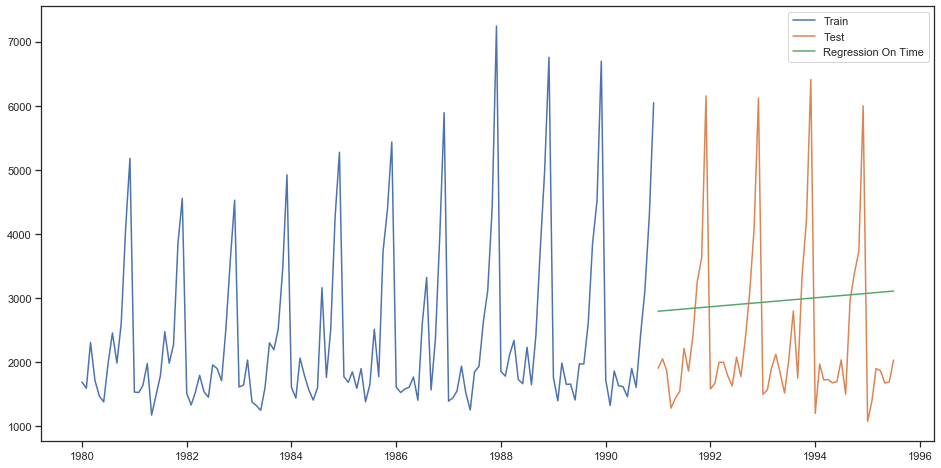

In [156]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [157]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 1389.135 MAPE is 50.15


In [158]:
tempResultsDf = pd.DataFrame({'Method': "Linear Regression on Time", 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,Naive Model,3864.279,152.87
0,Simple Average,1275.082,38.90
0,MA_3,1028.606,29.73
0,MA_6,1283.927,43.86
0,MA_9,1346.278,46.86
0,MA_12,1267.925,40.19
0,Linear Regression on Time,1389.135,50.15


# Single Exponential Smoothing 

Only captures the level in the time series.

In [159]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
model = SimpleExpSmoothing(train['Sparkling'])

In [160]:
#finding the value of alpha from the training dataset
model_fit = model.fit(optimized = True)
print('== Simple Exponential Smoothing \n')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))

== Simple Exponential Smoothing 

Smoothing Level 0.0
Initial Level 2403.7626


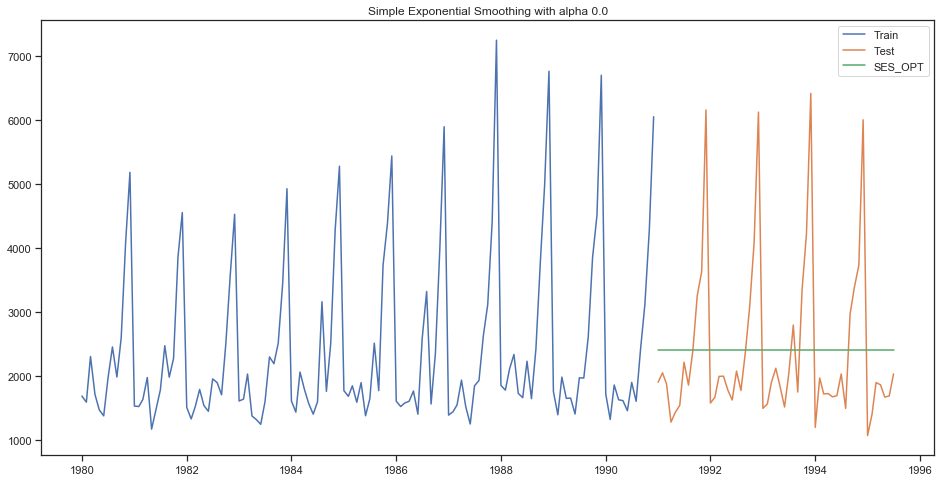

In [161]:
#forecasting the values for test dataset
y_hat_avg['SES']     = model_fit.forecast(len(test['Sparkling']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label = 'Train')
plt.plot(test['Sparkling'],   label = 'Test')
plt.plot(y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [162]:
#Model Validation
rmse_opt             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg.SES))
mape_opt             =  MAPE(test['Sparkling'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.00,  RMSE is 1275.0817 MAPE is 38.90


In [163]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                      Method         rmse    mape
0                Naive Model  3864.279000  152.87
0             Simple Average  1275.082000   38.90
0                       MA_3  1028.606000   29.73
0                       MA_6  1283.927000   43.86
0                       MA_9  1346.278000   46.86
0                      MA_12  1267.925000   40.19
0  Linear Regression on Time  1389.135000   50.15
0                        SES  1275.081739   38.90


# Double Exponential Model

As the series has a level and trend, we should go ahead and build the double exponential i.e. holt's model to capture both - level and trend

In [164]:
#Picking both - the level and trend from the time series to build the model
model = Holt(np.asarray(train['Sparkling']))
model_fit = model.fit()
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value )
print('Smoothing Slope', np.round(model_fit.params['smoothing_slope'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))

Smoothing Level 0.6478
Smoothing Slope 0.0
Initial Level 1686.0838


In [165]:
#forecasting for test dataset
Pred_Holt = test.copy()
Pred_Holt['Opt'] = model_fit.forecast(len(test['Sparkling']))

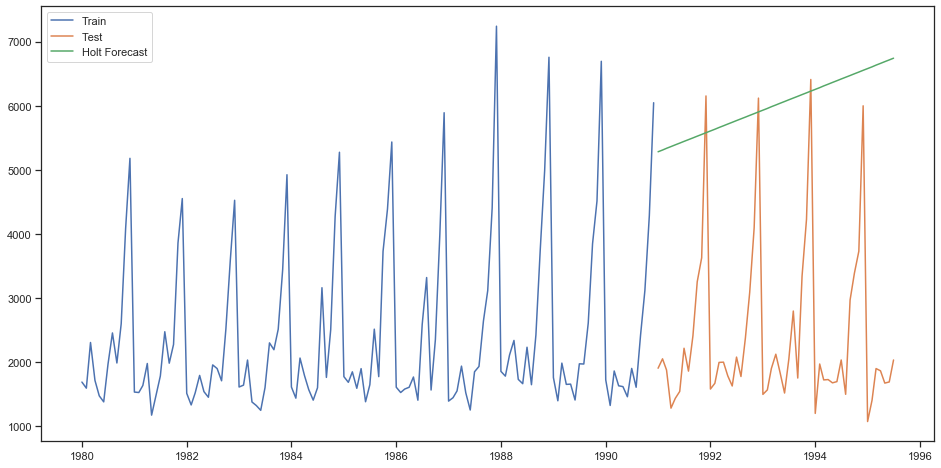

In [166]:
#plotting the original train and test data and forecasted values
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(Pred_Holt['Opt'], label='Holt Forecast')
plt.legend(loc='best')
plt.show()

In [167]:
#Model Evaluation using RMSE and MAPE
df_pred_opt          =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Sparkling'].values})

rmse_opt             =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))
mape_opt             =  MAPE(df_pred_opt.Y, df_pred_opt.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.65,  RMSE is 3850.8478 MAPE is 152.06


In [168]:
tempResultsDf = pd.DataFrame({'Method': 'Holt Model', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                      Method         rmse    mape
0                Naive Model  3864.279000  152.87
0             Simple Average  1275.082000   38.90
0                       MA_3  1028.606000   29.73
0                       MA_6  1283.927000   43.86
0                       MA_9  1346.278000   46.86
0                      MA_12  1267.925000   40.19
0  Linear Regression on Time  1389.135000   50.15
0                        SES  1275.081739   38.90
0                 Holt Model  3850.847815  152.06


# Holt Winter's Model - Additive Seasonality

In [169]:
#Picking all 3 components of time series i.e. level, trend and seasonlity to build the model - using additive approach for seasonal component
y_hat_avg = test.copy()
model_fit = ExponentialSmoothing(np.asarray(train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [170]:
#forecasting for the test dataset
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

In [171]:
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))

Smoothing Level:  0.0862
Smoothing Slope:  0.0
Smoothing Seasonal:  0.4764
Initial Level:  1684.9038
Initial Slope:  0.0039
Initial Seasons:  [  39.1759  -37.2235  464.4561  206.2765 -140.6041 -156.5696  338.1067
  856.9148  403.6538  971.2986 2401.5434 3426.5145]


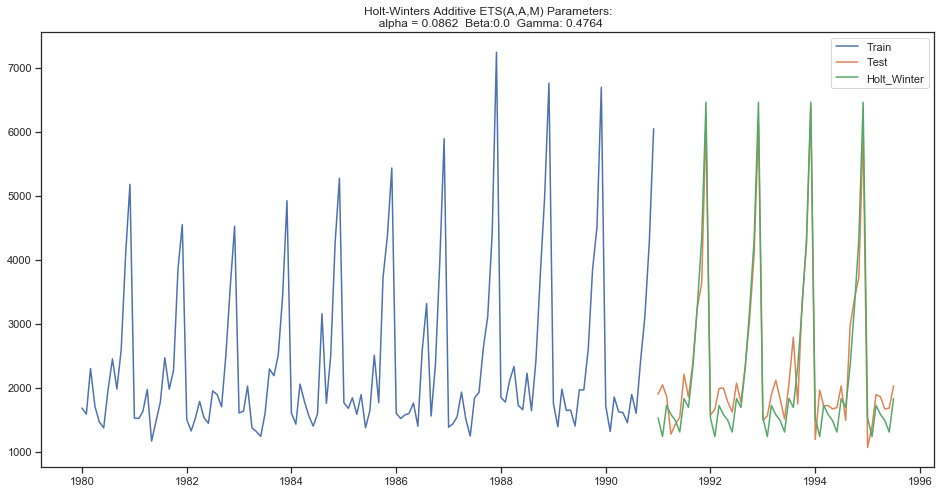

In [172]:
#plotting the original time series (train and test data) and forecasted time series
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Additive ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [173]:
#model evaluation using RMSE and MAPE
rmse_opt             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_Winter']))
mape_opt             =  MAPE(test['Sparkling'], y_hat_avg['Holt_Winter'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.09, beta = 0.00, gamma = 0.48, RMSE is 362.7542 MAPE is 12.08


In [174]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter (Additive Model)', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                         Method         rmse    mape
0                   Naive Model  3864.279000  152.87
0                Simple Average  1275.082000   38.90
0                          MA_3  1028.606000   29.73
0                          MA_6  1283.927000   43.86
0                          MA_9  1346.278000   46.86
0                         MA_12  1267.925000   40.19
0     Linear Regression on Time  1389.135000   50.15
0                           SES  1275.081739   38.90
0                    Holt Model  3850.847815  152.06
0  Holt_Winter (Additive Model)   362.754160   12.08


# Holt-Winters Method - Multiplicative Model 

In [175]:
#building the multiplicative model to compare with the results of other models
y_hat_avg = test.copy()
model_fit = ExponentialSmoothing(np.asarray(train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='mul').fit()

In [176]:
#forecasting for test data
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(test))

In [177]:
#printing values of alpha, beta, gamma 
print('== Holt-Winters Multplicative ETS(A,A,M) Parameters == \n')

alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))

== Holt-Winters Multplicative ETS(A,A,M) Parameters == 

Smoothing Level:  0.1542
Smoothing Slope:  0.0
Smoothing Seasonal:  0.3713
Initial Level:  1639.9993
Initial Slope:  4.8464
Initial Seasons:  [1.0084 0.969  1.2418 1.1321 0.9398 0.9381 1.2246 1.5443 1.2734 1.632
 2.4829 3.1186]


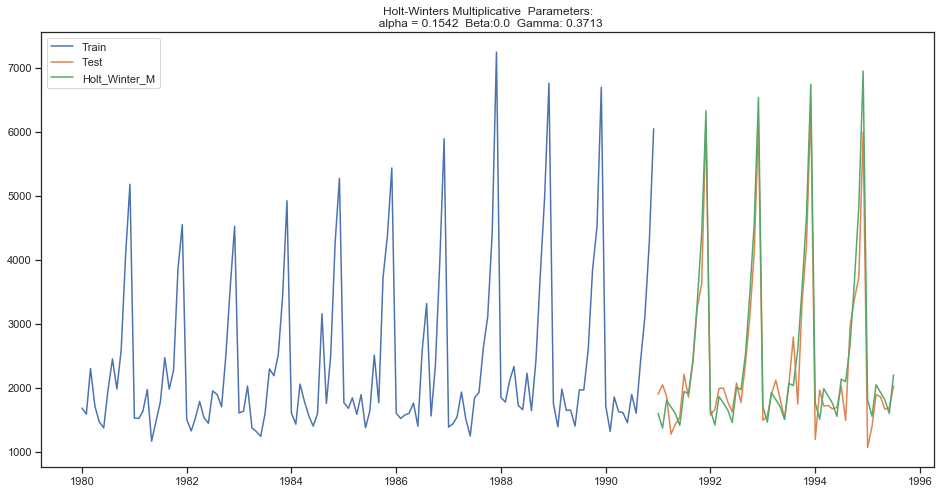

In [178]:
#Plotting the original series and forecasted series 
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [179]:
#model evaluation using RMSE and MAPE
rmse_opt             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_Winter_M']))
mape_opt             =  MAPE(test['Sparkling'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.15, beta = 0.00, gamma = 0.37, RMSE is 383.1223 MAPE is 11.90


In [180]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter M', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [181]:
print(resultsDf)

                         Method         rmse    mape
0                   Naive Model  3864.279000  152.87
0                Simple Average  1275.082000   38.90
0                          MA_3  1028.606000   29.73
0                          MA_6  1283.927000   43.86
0                          MA_9  1346.278000   46.86
0                         MA_12  1267.925000   40.19
0     Linear Regression on Time  1389.135000   50.15
0                           SES  1275.081739   38.90
0                    Holt Model  3850.847815  152.06
0  Holt_Winter (Additive Model)   362.754160   12.08
0                 Holt_Winter M   383.122273   11.90


As we can infere from above score of RMSE and correspondent MAPE, Holt Winter model with additive seasonality fits best to the data we have.

With the lowest score of RMSE i.e. 362.79 and 12.08 MAPE, Holt winters model(additive seasonality)suits the best.

From the time series, we can obviously see that its an additive time series, not multiplicative.

# Checking for the stationarity of the timeseries

In [182]:
from statsmodels.tsa.stattools import adfuller

In [183]:
dftest = adfuller(spark.Sparkling)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


H0 = Time series is not stationary

Ha = Time series is stationary

As the p value is much higher than .05, we fail to reject the null hypothesis i.e. the series is not stationary. Same thing can also be observed from the graph where we can cleary see a seasonal component and trend as well. Hence we need to convert the non stationary series to stationary series in order to perform ARIMA, SARIMA Models.

<Figure size 576x288 with 0 Axes>

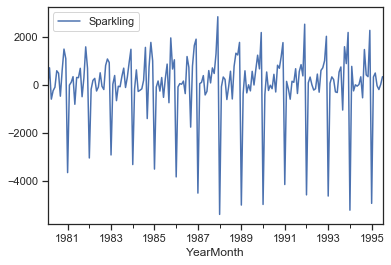

In [184]:
#converting the non stationary time series to stationary by differencing
plt.figure(figsize=(8, 4))
spark_new = spark.diff(periods =1).dropna()
spark_new.plot()

visually, the series looks stationary now, however lets also check the same using Augmented Dicky Fuller test to confirm.

In [185]:
dftest = adfuller(spark_new.Sparkling)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -45.050
DF test p-value is 0.0000


As the p value is less than critical value i.e. 0.05, we reject the null hypothesis i.e. we accept the alternate hypothesis which says the time series is stationary.

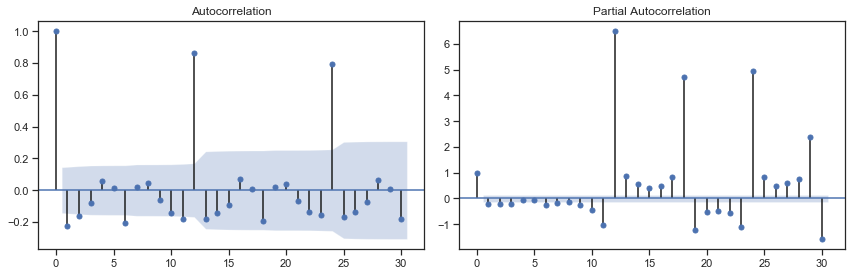

In [186]:
#plotting the ACF graph to see the stationarity
import statsmodels.tsa.api as smt

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(spark_new, lags=30, ax=axes[0])
smt.graphics.plot_pacf(spark_new, lags=30, ax=axes[1])
plt.tight_layout()

Stationary series have an ACF that decays fast and remains within the significance range(blue band) except for a few (3) lags.
This is indicative of a stationary series.




In [187]:
import itertools
p = q = range(0, 3)
d= range(1,2) #as the time series becomes stationary after differencing once, we will keep starting value of d as 1
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 1)(0, 1, 2, 12)
Model: (0, 1, 2)(1, 1, 0, 12)
Model: (0, 1, 2)(1, 1, 1, 12)


# Building ARIMA Models

In [188]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

,param,AIC


In [189]:
#building the ARIMA model with different values of p,d,q and finding out what values of p,d,q are most optimized by looking at lowest AIC score.

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train.Sparkling, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064376843794
ARIMA(0, 1, 2) - AIC:2232.783097684644
ARIMA(1, 1, 0) - AIC:2268.5280607731743
ARIMA(1, 1, 1) - AIC:2235.0139453498614
ARIMA(1, 1, 2) - AIC:2233.5976471230297
ARIMA(2, 1, 0) - AIC:2262.035600271052
ARIMA(2, 1, 1) - AIC:2232.3604898831895
ARIMA(2, 1, 2) - AIC:2210.6178170236394


In [190]:
dfObj.sort_values(by=['AIC'])

,param,AIC
8,"(2, 1, 2)",2210.617817
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906438
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [191]:
## ARIMA(2,1,2) has the lowest AIC -2210.617817
mod = ARIMA(train['Sparkling'], order=(2,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.361
Date:                Sun, 13 Sep 2020   AIC                           2210.618
Time:                        18:08:47   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.517     10.810      0.000       4.573       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [192]:
final_hat_avg =test.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test))
pred_ARIMA[0]

array([4245.72169764, 2816.97304306, 2013.21948502, 1794.46453737,
       1968.50349773, 2313.66404691, 2656.11055857, 2899.25974171,
       3017.83409457, 3033.83387176, 2989.35537712, 2925.53252592,
       2871.0206619 , 2839.16798624, 2830.87422387, 2839.80514412,
       2857.41310932, 2876.39171182, 2892.25055144, 2903.3799475 ,
       2910.25103028, 2914.36371088, 2917.35879117, 2920.47973237,
       2924.38650579, 2929.22068794, 2934.79239137, 2940.78118136,
       2946.88650858, 2952.90619939, 2958.75186646, 2964.42451314,
       2969.97492226, 2975.46701955, 2980.95353747, 2986.46563267,
       2992.01333299, 2997.59192062, 3003.18978763, 3008.79483601,
       3014.39820481, 3019.99541823, 3025.58575589, 3031.17081003,
       3036.75300611, 3042.33453229, 3047.91680866, 3053.50041294,
       3059.08528327, 3064.67101751, 3070.25713968, 3075.84327053,
       3081.42919515, 3087.01485298, 3092.60028758])

In [193]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Sparkling,pred_ARIMA[0]))
print(rmse)

1374.8038969457405


In [194]:
tempResultsDf = pd.DataFrame({'Method': 'Auto ARIMA', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

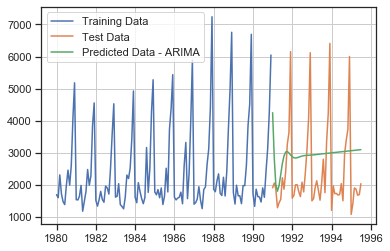

In [195]:
plt.plot(train.Sparkling,label='Training Data')
plt.plot(test.Sparkling,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Building SARIMA Model

In [196]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [197]:
#building the ARIMA model with different values of p,d,q and P,D,Q and finding out what values of p,d,q are most optimized by looking at lowest AIC score.

import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1626.8626334678927
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1452.677357425267
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1628.3243908190555
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1454.5289621307268
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1468.5000981866692
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:1455.991155361994
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1760.6565719828507
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1569.663923423001
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:1399.1083846680704
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1602.8594819023865
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1570.8550259195445
SARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:1400.6709524137593
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:1428.2448811165514
SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:1429.6168027963354
SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - A

In [199]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
47,"(1, 1, 2)","(0, 1, 2, 12)",1382.347780
20,"(0, 1, 2)","(0, 1, 2, 12)",1382.484254
50,"(1, 1, 2)","(1, 1, 2, 12)",1384.137874
74,"(2, 1, 2)","(0, 1, 2, 12)",1384.317618
23,"(0, 1, 2)","(1, 1, 2, 12)",1384.398867
...,...,...,...
63,"(2, 1, 1)","(0, 1, 0, 12)",1758.561638
9,"(0, 1, 1)","(0, 1, 0, 12)",1760.656572
54,"(2, 1, 0)","(0, 1, 0, 12)",1779.635949
27,"(1, 1, 0)","(0, 1, 0, 12)",1810.951302


In [200]:
### SARIMA(1,1,2)(0,1,2,12) - AIC:1382.347780
mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(0,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sun, 13 Sep 2020   AIC                           1382.348
Time:                                    18:11:13   BIC                           1397.479
Sample:                                01-01-1980   HQIC                          1388.455
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

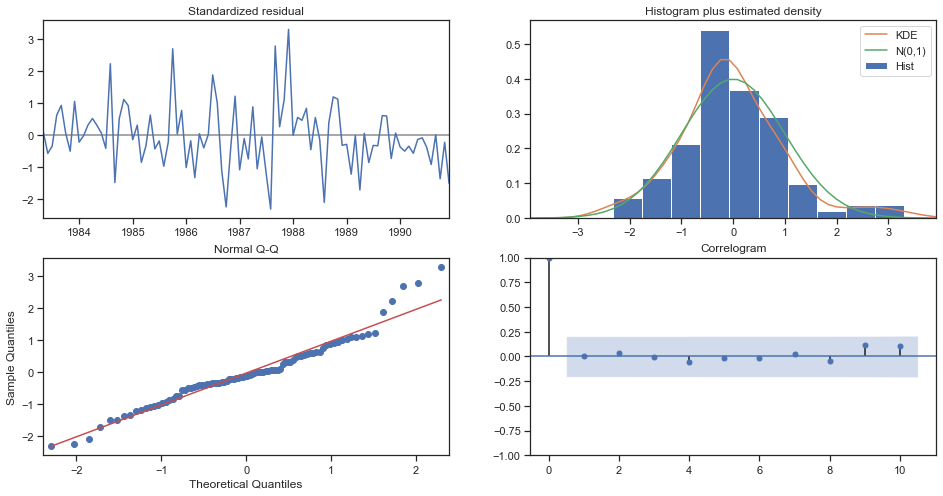

In [201]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [202]:
#forecasting for test data
final_hat_avg =test.copy()
pred_SARIMA = results.get_forecast(steps=len(test))


In [203]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test.Sparkling,pred_SARIMA.predicted_mean))
print(rmse)

382.5767349822621


In [204]:
tempResultsDf = pd.DataFrame({'Method': 'Auto SARIMA', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

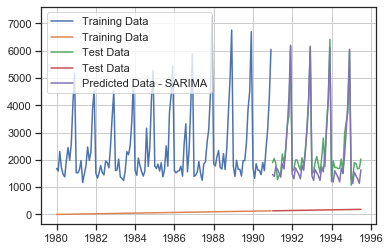

In [205]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [206]:
print(resultsDf)

                         Method         rmse    mape
0                   Naive Model  3864.279000  152.87
0                Simple Average  1275.082000   38.90
0                          MA_3  1028.606000   29.73
0                          MA_6  1283.927000   43.86
0                          MA_9  1346.278000   46.86
0                         MA_12  1267.925000   40.19
0     Linear Regression on Time  1389.135000   50.15
0                           SES  1275.081739   38.90
0                    Holt Model  3850.847815  152.06
0  Holt_Winter (Additive Model)   362.754160   12.08
0                 Holt_Winter M   383.122273   11.90
0                    Auto ARIMA  1374.803897     NaN
0                   Auto SARIMA   382.576735     NaN


# Building ARIMA Models based on cut off points of ACF and PACF

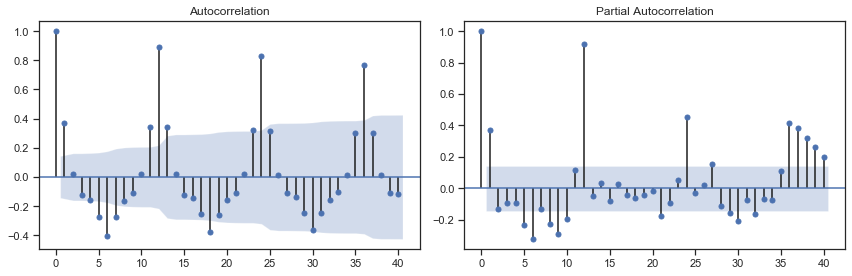

In [207]:
#plotting the ACF graph for original series
import statsmodels.tsa.api as smt

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(spark, lags=40, ax=axes[0])
smt.graphics.plot_pacf(spark, lags=40, ax=axes[1])
plt.tight_layout()

AR component (p) can be investigated first with lag length selected from the PACF i.e. 1 in our case.


MA component (q) can be investigated first with lag length selected from the ACF i.e. 1 in our case.


d is the order of differencing which makes the series stationary - in our case it is 1.

Hence building the model keeping values of p,d,f = (1,1,1)

In [208]:
from statsmodels.tsa.arima_model import ARIMA

inputseries = np.asarray(train.Sparkling)
model_arima = ARIMA(inputseries, order = (1,1,1))
model_fit = model_arima.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1113.507
Method:                       css-mle   S.D. of innovations           1171.377
Date:                Sun, 13 Sep 2020   AIC                           2235.014
Time:                        18:11:15   BIC                           2246.515
Sample:                             1   HQIC                          2239.687
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7489      4.616      1.462      0.144      -2.299      15.797
ar.L1.D.y      0.4289      0.082      5.221      0.000       0.268       0.590
ma.L1.D.y     -1.0000      0.019    -51.962      0.0

In [209]:
#forecasting for test data
pred_ARIMA = model_fit.forecast(steps=len(test))
pred_ARIMA[0]

array([4215.69048887, 3434.0210946 , 3102.58521558, 2964.27287957,
       2908.79911866, 2888.85820589, 2884.1587829 , 2885.99705737,
       2890.63961729, 2896.48504977, 2902.84644343, 2909.4291539 ,
       2916.10679619, 2922.82515862, 2929.56098758, 2936.30430864,
       2943.05084338, 2949.79875659, 2956.54726108, 2963.29601921,
       2970.04488612, 2976.79379969, 2983.54273329, 2990.29167547,
       2997.04062133, 3003.78956877, 3010.53851689, 3017.2874653 ,
       3024.03641383, 3030.78536242, 3037.53431103, 3044.28325965,
       3051.03220828, 3057.7811569 , 3064.53010553, 3071.27905416,
       3078.02800279, 3084.77695141, 3091.52590004, 3098.27484867,
       3105.0237973 , 3111.77274593, 3118.52169455, 3125.27064318,
       3132.01959181, 3138.76854044, 3145.51748907, 3152.26643769,
       3159.01538632, 3165.76433495, 3172.51328358, 3179.2622322 ,
       3186.01118083, 3192.76012946, 3199.50907809])

In [210]:
#Model evaluation
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Sparkling,pred_ARIMA[0]))
print(rmse)

1461.6658687866184


Analyze the result - 
To see how our first model perform, we can plot the residual distribution.For a good model, we want to see the residual is normal distribution. And ACF, PACF has not significant terms.

In [211]:
from scipy import stats
from scipy.stats import normaltest

resid = model_fit.resid
print(normaltest(resid))

NormaltestResult(statistic=9.556973909152937, pvalue=0.008408712110661399)


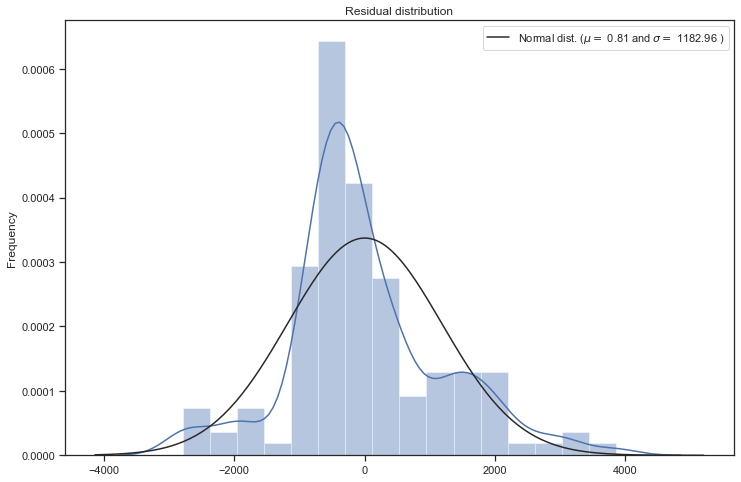

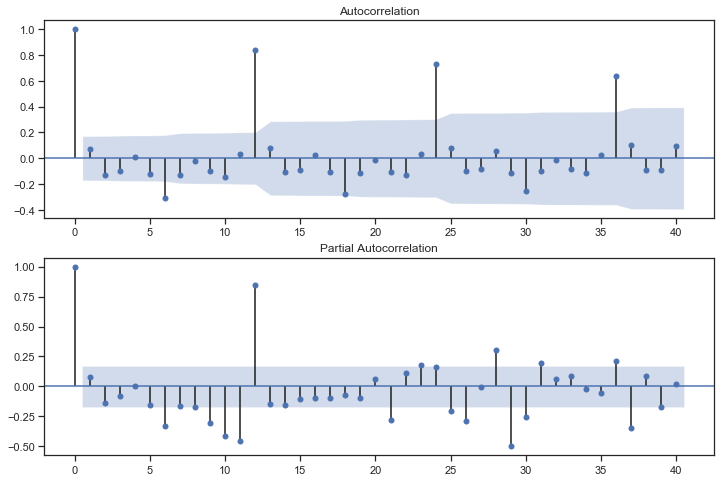

In [212]:
fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)
sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
import statsmodels.api as sm


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(model_fit.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(model_fit.resid, lags=40, ax=ax2)

The graph doesnt look like a normal distribution. Also we see a recurring correlation exists in ACF. So we need to deal with seasonality.



In [213]:
tempResultsDf = pd.DataFrame({'Method': 'Manual ARIMA', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

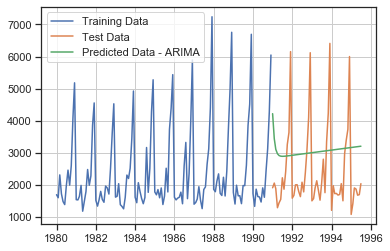

In [214]:
plt.plot(train.Sparkling,label='Training Data')
plt.plot(test.Sparkling,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# SARIMA Model from ACF/PACF Curve

In [215]:
mod = sm.tsa.statespace.SARIMAX(train.Sparkling, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -882.207
Date:                            Sun, 13 Sep 2020   AIC                           1774.415
Time:                                    18:11:19   BIC                           1788.311
Sample:                                01-01-1980   HQIC                          1780.058
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2377      0.089      2.662      0.008       0.063       0.413
ma.L1         -0.9983      0.483   

In [216]:
#forecasting for test data
pred_ARIMA = results.forecast(steps=len(test))
pred_ARIMA

1991-01-01    1625.256713
1991-02-01    1427.511203
1991-03-01    1936.341271
1991-04-01    1780.669684
1991-05-01    1693.961645
1991-06-01    1511.550220
1991-07-01    2016.691072
1991-08-01    1840.399970
1991-09-01    2487.492492
1991-10-01    3363.312033
1991-11-01    4457.839003
1991-12-01    6344.838840
1992-01-01    1723.508217
1992-02-01    1485.523260
1992-03-01    1976.860695
1992-04-01    1825.499182
1992-05-01    1730.384800
1992-06-01    1545.265811
1992-07-01    2056.860203
1992-08-01    1892.675214
1992-09-01    2522.068740
1992-10-01    3416.810284
1992-11-01    4503.567814
1992-12-01    6403.538205
1993-01-01    1761.661790
1993-02-01    1519.534530
1993-03-01    2009.071250
1993-04-01    1858.153422
1993-05-01    1762.173680
1993-06-01    1576.775971
1993-07-01    2089.034698
1993-08-01    1926.095929
1993-09-01    2553.667496
1993-10-01    3450.356897
1993-11-01    4536.314630
1993-12-01    6437.620227
1994-01-01    1793.628801
1994-02-01    1551.075127
1994-03-01  

In [217]:
#forecasting for test data
pred_SARIMA = results.forecast(steps=55)
pred_SARIMA

1991-01-01    1625.256713
1991-02-01    1427.511203
1991-03-01    1936.341271
1991-04-01    1780.669684
1991-05-01    1693.961645
1991-06-01    1511.550220
1991-07-01    2016.691072
1991-08-01    1840.399970
1991-09-01    2487.492492
1991-10-01    3363.312033
1991-11-01    4457.839003
1991-12-01    6344.838840
1992-01-01    1723.508217
1992-02-01    1485.523260
1992-03-01    1976.860695
1992-04-01    1825.499182
1992-05-01    1730.384800
1992-06-01    1545.265811
1992-07-01    2056.860203
1992-08-01    1892.675214
1992-09-01    2522.068740
1992-10-01    3416.810284
1992-11-01    4503.567814
1992-12-01    6403.538205
1993-01-01    1761.661790
1993-02-01    1519.534530
1993-03-01    2009.071250
1993-04-01    1858.153422
1993-05-01    1762.173680
1993-06-01    1576.775971
1993-07-01    2089.034698
1993-08-01    1926.095929
1993-09-01    2553.667496
1993-10-01    3450.356897
1993-11-01    4536.314630
1993-12-01    6437.620227
1994-01-01    1793.628801
1994-02-01    1551.075127
1994-03-01  

In [218]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test.Sparkling,pred_SARIMA))
print(rmse)

340.97531430737024


In [219]:
tempResultsDf = pd.DataFrame({'Method': 'Manual SARIMA', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

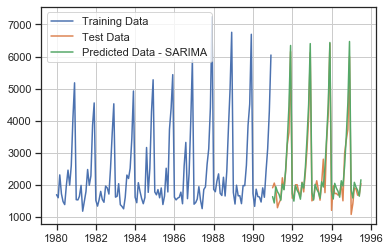

In [220]:
plt.plot(train.Sparkling,label='Training Data')
plt.plot(test.Sparkling,label='Test Data')
plt.plot(test.index,pred_SARIMA,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [221]:
print(resultsDf)

                         Method         rmse    mape
0                   Naive Model  3864.279000  152.87
0                Simple Average  1275.082000   38.90
0                          MA_3  1028.606000   29.73
0                          MA_6  1283.927000   43.86
0                          MA_9  1346.278000   46.86
0                         MA_12  1267.925000   40.19
0     Linear Regression on Time  1389.135000   50.15
0                           SES  1275.081739   38.90
0                    Holt Model  3850.847815  152.06
0  Holt_Winter (Additive Model)   362.754160   12.08
0                 Holt_Winter M   383.122273   11.90
0                    Auto ARIMA  1374.803897     NaN
0                   Auto SARIMA   382.576735     NaN
0                  Manual ARIMA  1461.665869     NaN
0                 Manual SARIMA   340.975314     NaN


# Building model on full data and prediction for next 12 months

In [222]:
full_data_model = sm.tsa.statespace.SARIMAX(spark['Sparkling'],
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1180.382
Date:                            Sun, 13 Sep 2020   AIC                           2370.765
Time:                                    18:11:22   BIC                           2386.141
Sample:                                01-01-1980   HQIC                          2377.009
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1151      0.082      1.398      0.162      -0.046       0.276
ma.L1         -0.9655      0.033   

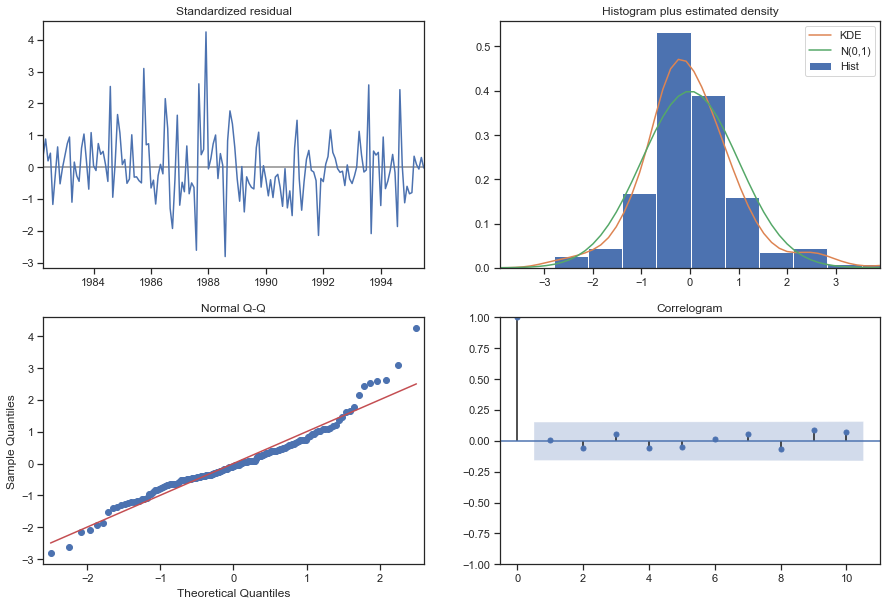

In [223]:
results_full_data_model.plot_diagnostics(figsize = (15,10));

In [224]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [225]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head(13)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1946.522135,384.306618,1193.295005,2699.749264
1995-09-01,2417.781897,388.581398,1656.176352,3179.387442
1995-10-01,3292.400625,389.089297,2529.799616,4055.001635
1995-11-01,3950.757200,389.399777,3187.547661,4713.966738
1995-12-01,6151.543147,389.690464,5387.763871,6915.322422
1996-01-01,1238.842718,389.978729,474.498455,2003.186982
1996-02-01,1613.898682,390.266526,848.990346,2378.807018
1996-03-01,1828.004469,390.554082,1062.532534,2593.476403
1996-04-01,1820.785241,390.841422,1054.750130,2586.820353
1996-05-01,1670.366521,391.128552,903.768646,2436.964395


In [226]:
rmse = mean_squared_error(spark['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 544.9800487093557


In [227]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

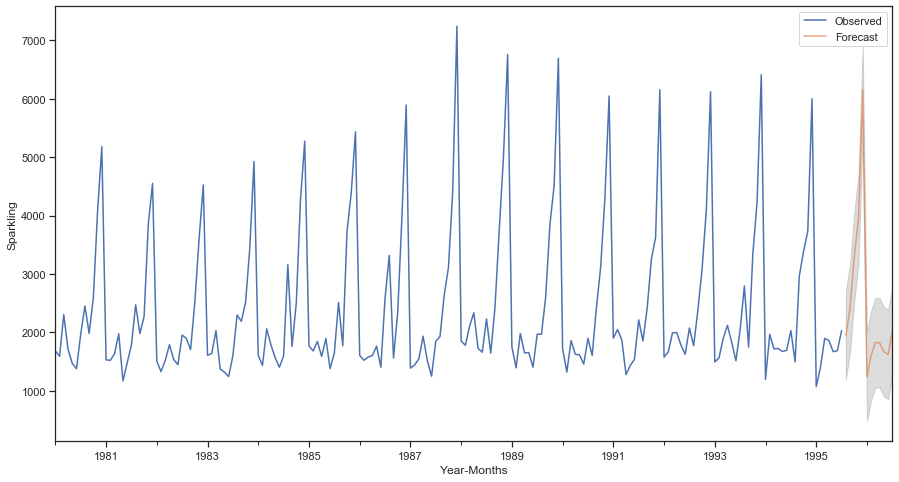

In [228]:
# plot the forecast along with the confidence band
plt.figure(figsize = (15,8))
axis = spark['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [229]:
resultsDf

,Method,rmse,mape
0,Naive Model,3864.279000,152.87
0,Simple Average,1275.082000,38.90
0,MA_3,1028.606000,29.73
0,MA_6,1283.927000,43.86
0,MA_9,1346.278000,46.86
0,MA_12,1267.925000,40.19
0,Linear Regression on Time,1389.135000,50.15
0,SES,1275.081739,38.90
0,Holt Model,3850.847815,152.06
0,Holt_Winter (Additive Model),362.754160,12.08
